# Explore SDSSRM-XCS Scatter: $M_{\rm{gas}}$-$L_{\rm{X}}$ a diagnostic for other relation scatter?

<span style="color:red">This section of the project explores potential reasons and diagnostics of galaxy cluster/group scaling relation scatter using the new SDSSRM-XCS relations constructed in this work from the properties measured in the first paper of this series [(Turner et al. 2024)](https://ui.adsabs.harvard.edu/abs/2025MNRAS.tmp...10T/abstract).
%
Here we use several relations to investigate whether there are obvious correlations between the scatter-from-expected-values of individual data points and whether the galaxy cluster/group that they represent had a targeted XMM observation or if the data were serendipitous. Separating clusters into targeted and serendipitous was an approach taken for the SDSSRM-XCS sample by [Giles et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022MNRAS.516.3878G/abstract) when examining $L_{\rm{X}}$-$T_{\rm{X}}$ relations. They found that distinctly different relations when treating the two 'classes' independently. 
%
Scaling relation fits were performed using the XGA interface to the R scaling-relation fitting package LIRA, see the paper for full details.
<\span>

## Main takeaways

In summary:

* The

## Import Statements 

In [31]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
from astropy.units import Quantity
from astropy.cosmology import LambdaCDM
import pickle
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# This adds the directory above to the path, allowing me to import the common functions that I've written in
#  common.py - this just saves me repeating boring code and makes sure its all consistent
import sys
sys.path.insert(0, '..')
from common import xcs_cosmo

import xga

## Loading data files and relations

We load the 'base' SDSSRM-XCS sample file, containing some basic information about galaxy cluster names, positions, and redshifts. We also load the SDSSRM-XCS cluster property results files from the first paper of this series.

The new SDSSRM-XCS scaling relations (constructed in the course of this work) that relate the hot gas mass and X-ray luminosity are also loaded in here - though we do not necessarily load and use _all_ of those relations. The relation data points and scatters will help to identify particular galaxy clusters to investigate, and to consider if this type of scaling relation can act as a diagnostic of likely scatter in _other_ scaling relations.

### SDSSRM-XCS base sample

In [3]:
sdssxcs_base = pd.read_csv("../../sample_files/SDSSRM-XCS_base_sample.csv")
sdssxcs_base.head(6)

,name,MEM_MATCH_ID,xapa_ra,xapa_dec,rm_ra,rm_dec,z,r500,r500-,r500+,richness,richness_err,XCS_NAME,R_LAMBDA,xmm_targeted,xmm_serendipitous
0,SDSSXCS-124,124,0.80058,-6.09182,0.798261,-6.091694,0.2475,1181.028,21.202,23.203,109.550,4.490,XMMXCS J000312.1-060530.5,1.018410,True,False
1,SDSSXCS-2789,2789,0.95554,2.06802,0.956981,2.066469,0.1053,1007.861,17.194,17.202,38.904,2.830,XMMXCS J000349.3+020404.8,0.827942,True,False
2,SDSSXCS-290,290,2.72264,29.16102,2.714137,29.161154,0.3485,913.052,30.879,31.210,105.096,5.994,XMMXCS J001053.4+290939.6,1.009990,True,False
3,SDSSXCS-1018,1018,4.40633,-0.87619,4.406711,-0.878340,0.2144,902.259,22.445,23.366,56.997,3.219,XMMXCS J001737.5-005234.2,0.893655,False,True
4,SDSSXCS-134,134,4.90839,3.60982,4.911069,3.599257,0.2773,1123.321,19.219,19.226,108.604,4.792,XMMXCS J001938.0+033635.3,1.016645,True,False
5,SDSSXCS-119,119,8.46470,-7.86290,8.471426,-7.869543,0.3042,944.275,46.422,46.747,128.192,5.697,XMMXCS J003351.5-075146.4,1.050926,True,False


Calculating E(z) values for these clusters:

In [4]:
sdssxcs_base['E'] = xcs_cosmo.efunc(sdssxcs_base['z'].values)

### SDSSRM-XCS $T_{\rm{X}}$ and $L_{\rm{X}}$

In [15]:
sdssxcs_txlx = pd.read_csv("../../sample_files/paper_one_results/sdssrm-xcs_txlx_v1.0.0.csv")
sdssxcs_txlx.head(6)

,name,Tx_500,Tx_500-,Tx_500+,Lx52_500,Lx52_500-,Lx52_500+,Lxbol_500,Lxbol_500-,Lxbol_500+,Tx_2500,Tx_2500-,Tx_2500+,Lx52_2500,Lx52_2500-,Lx52_2500+,Lxbol_2500,Lxbol_2500-,Lxbol_2500+,Tx_500ce,Tx_500ce-,Tx_500ce+,Lx52_500ce,Lx52_500ce-,Lx52_500ce+,Lxbol_500ce,Lxbol_500ce-,Lxbol_500ce+
0,SDSSXCS-124,6.92000,0.116389,0.111642,5.310408e+44,2.494586e+42,3.193270e+42,2.039754e+45,2.082091e+43,1.712354e+43,7.08946,0.097823,0.097929,4.008461e+44,2.163312e+42,1.887667e+42,1.557705e+45,1.278003e+43,1.166420e+43,6.78098,0.134306,0.158223,3.684827e+44,2.702225e+42,2.572964e+42,1.401501e+45,1.425781e+43,1.280567e+43
1,SDSSXCS-2789,4.54033,0.073600,0.074023,1.029575e+44,5.149604e+41,6.858712e+41,3.213527e+44,3.914562e+42,3.124017e+42,4.44237,0.057404,0.057774,7.125319e+43,4.164749e+41,3.793543e+41,2.201238e+44,1.767406e+42,1.642524e+42,4.65452,0.108600,0.113677,6.943669e+43,6.482835e+41,5.773788e+41,2.192642e+44,2.960496e+42,2.652251e+42
2,SDSSXCS-290,5.31681,0.297854,0.336308,2.856695e+44,5.917234e+42,7.322989e+42,9.632533e+44,4.005991e+43,3.207763e+43,5.41431,0.259989,0.309605,2.033267e+44,4.662931e+42,4.169953e+42,6.920658e+44,2.211700e+43,1.983518e+43,5.44819,0.407899,0.486340,1.972104e+44,6.434636e+42,6.092122e+42,6.734043e+44,3.038773e+43,2.687861e+43
3,SDSSXCS-1018,3.90154,0.143544,0.151498,8.044819e+43,1.441322e+42,9.241468e+41,2.335851e+44,6.385493e+42,4.924304e+42,4.09555,0.108381,0.115430,6.395952e+43,8.467201e+41,7.602523e+41,1.899850e+44,3.436098e+42,3.542190e+42,3.93098,0.207281,0.230478,5.048987e+43,1.253282e+42,1.066663e+42,1.471118e+44,5.740520e+42,4.871391e+42
4,SDSSXCS-134,6.72622,0.116523,0.116565,4.811899e+44,2.458557e+42,3.050440e+42,1.825296e+45,2.068757e+43,1.639058e+43,7.04643,0.104430,0.104760,3.813160e+44,2.170963e+42,1.872005e+42,1.479760e+45,1.263153e+43,1.208755e+43,6.37686,0.135837,0.153820,3.447715e+44,2.713877e+42,2.497416e+42,1.273855e+45,1.415497e+43,1.228583e+43
5,SDSSXCS-119,4.93456,0.400268,0.456173,2.049789e+44,5.182032e+42,6.885075e+42,6.654626e+44,4.141700e+43,3.282061e+43,5.41255,0.397709,0.448294,1.239172e+44,3.785057e+42,3.735144e+42,4.215892e+44,2.155310e+43,1.870703e+43,4.91222,0.432241,0.503558,1.821676e+44,5.522211e+42,5.714386e+42,5.900648e+44,3.822404e+43,2.772960e+43


### SDSSRM-XCS masses

In [16]:
sdssxcs_mass = pd.read_csv("../../sample_files/paper_one_results/sdssrm-xcs_mass_v1.0.0.csv")
sdssxcs_mass.head(6)

,name,Mhy500,Mhy500-,Mhy500+,Mg500,Mg500-,Mg500+,Mhy2500,Mhy2500-,Mhy2500+,Mg2500,Mg2500-,Mg2500+,Mhy500_wraderr,Mhy500_wraderr-,Mhy500_wraderr+,Mg500_wraderr,Mg500_wraderr-,Mg500_wraderr+,Mhy2500_wraderr,Mhy2500_wraderr-,Mhy2500_wraderr+,Mg2500_wraderr,Mg2500_wraderr-,Mg2500_wraderr+
0,SDSSXCS-124,7.634491,1.286289,1.029318,0.869914,0.002841,0.005951,2.621329,0.112240,0.137975,0.321744,0.000722,0.000734,7.635562,1.285474,1.041261,0.870390,0.015662,0.016223,2.621462,0.113380,0.138668,0.321697,0.007076,0.007250
1,SDSSXCS-2789,7.820374,1.259755,1.447212,0.218603,0.002491,0.002496,1.602926,0.101929,0.109311,0.097414,0.000324,0.000329,7.823912,1.268244,1.456225,0.218499,0.002874,0.002963,1.602810,0.102195,0.110153,0.097399,0.001819,0.001737
2,SDSSXCS-290,2.961604,0.369827,0.382523,0.427969,0.002132,0.002098,1.467429,0.175603,0.290465,0.134154,0.000759,0.000773,2.959792,0.390293,0.420849,0.427478,0.019454,0.019887,1.469441,0.177871,0.288247,0.134133,0.005839,0.005993
3,SDSSXCS-1018,5.067958,1.015270,0.969362,0.210208,0.001929,0.001917,1.128892,0.103503,0.149913,0.084371,0.000350,0.000359,5.072697,1.030805,0.973924,0.210059,0.003374,0.003431,1.128619,0.104011,0.149860,0.084350,0.002327,0.002330
4,SDSSXCS-134,6.802619,0.782566,0.772819,0.767290,0.002149,0.002170,3.043225,0.113304,0.110341,0.313945,0.000359,0.000367,6.803511,0.788996,0.781372,0.767157,0.010866,0.010814,3.042067,0.125878,0.124549,0.313911,0.007265,0.007068
5,SDSSXCS-119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Combining tables

In [17]:
sdssxcs_samp = pd.merge(sdssxcs_base, sdssxcs_txlx, left_on='name', right_on='name', how='outer')
sdssxcs_samp = pd.merge(sdssxcs_samp, sdssxcs_mass, left_on='name', right_on='name', how='outer')

### $M^{\rm{gas}}_{2500}$-$L^{\rm{bol}}_{\rm{X,2500}}$

In [6]:
with open('../../outputs/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas2500_lxbol_2500.xgarel', 'rb') as scalo:
    mgas2500_lxbol_2500 = pickle.load(scalo)

### $M^{\rm{gas}}_{2500}$-$L^{\rm{0.5-2.0}}_{\rm{X,2500}}$

In [68]:
with open('../../outputs/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas2500_lx52_2500.xgarel', 'rb') as scalo:
    mgas2500_lx52_2500 = pickle.load(scalo)

### $M^{\rm{gas}}_{500}$-$L^{\rm{bol}}_{\rm{X,500}}$

In [7]:
with open('../../outputs/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas500_lxbol_500.xgarel', 'rb') as scalo:
    mgas500_lxbol_500 = pickle.load(scalo)

### $M^{\rm{gas}}_{500}$-$L^{\rm{bol}}_{\rm{X,500ce}}$

In [13]:
with open('../../outputs/scaling_relations/sdssrm-xcs_new/mgas-lx/turner2025_mgas500_lxbol_500ce.xgarel', 'rb') as scalo:
    mgas500_lxbol_500ce = pickle.load(scalo)

## ...

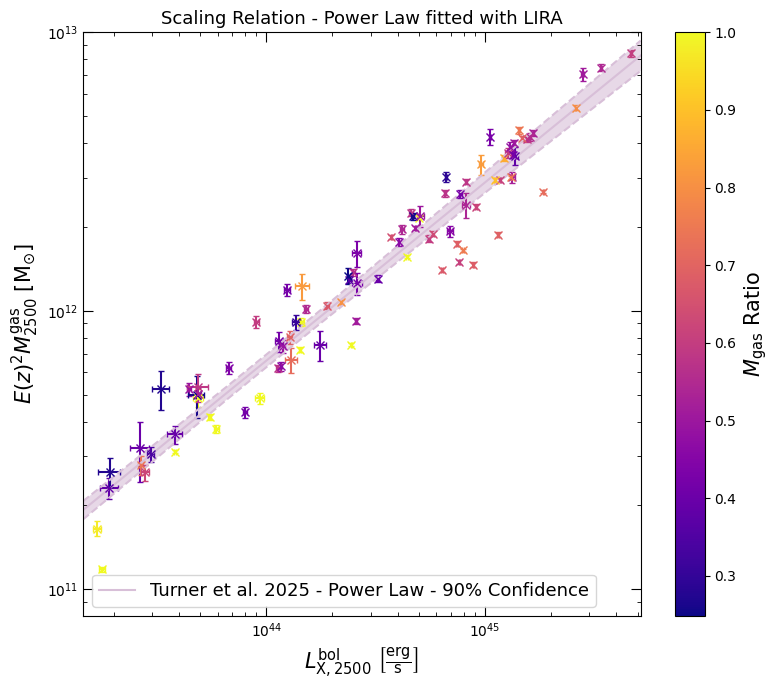

In [61]:
# As the relation is not guaranteed to contain all the data points in the same file, nor to necessarily be in the same order, we 
#  use this search-sorted trick to get the indices in the base sample that correspond to the names given to each datapoint when 
#  the scaling relation was constructed
sort_rel_names = np.argsort(sdssxcs_samp['name'].values)
pnt_samp_ind = sort_rel_names[np.searchsorted(sdssxcs_samp['name'].values, mgas2500_lxbol_2500.point_names, sorter=sort_rel_names)]

# Reads out gas masses in two apertures, in the right order!
mgas2500 = sdssxcs_samp.loc[pnt_samp_ind, 'Mg2500_wraderr'].values
mgas500 = sdssxcs_samp.loc[pnt_samp_ind, 'Mg500_wraderr'].values

# Don't recommend setting attributes directly, but apparently I never added property setters for these when I 
#  wrote this class
rat = (mgas2500 / (mgas500-mgas2500))
rat[rat > 1] = 1
mgas2500_lxbol_2500._third_dim_info = rat
mgas2500_lxbol_2500._third_dim_name = r"$M_{\rm{gas}}$ Ratio"

mgas2500_lxbol_2500.view(figsize=(8, 7), y_lims=Quantity([0.8e+11, 1e+13], 'Msun'), label_points=False, 
                         point_label_offset=(0.01, 0.001))

In [95]:
clump_inds = np.array([31, 90, 24, 64, 15, 5, 80])

In [96]:
sdssxcs_base[sdssxcs_base['name'].isin(mgas2500_lxbol_2500.point_names[clump_inds])]

,name,MEM_MATCH_ID,xapa_ra,xapa_dec,rm_ra,rm_dec,z,r500,r500-,r500+,richness,richness_err,XCS_NAME,R_LAMBDA,xmm_targeted,xmm_serendipitous,E
12,SDSSXCS-11331,11331,16.70560,1.05689,16.710521,1.069712,0.2535,723.331,13.190,13.198,31.445,3.023,XMMXCS J010649.3+010324.7,0.793432,True,False,1.136166
21,SDSSXCS-7783,7783,30.42957,-2.19626,30.445154,-2.198310,0.1942,827.691,14.487,14.504,35.853,3.227,XMMXCS J020143.0-021146.5,0.814528,True,False,1.100418
34,SDSSXCS-572,572,42.01396,-3.52873,42.014131,-3.529230,0.1883,866.231,13.686,13.694,80.276,6.406,XMMXCS J024803.3-033143.4,0.957011,True,False,1.096989
45,SDSSXCS-9803,9803,135.15352,20.89461,135.175696,20.895260,0.2529,841.265,14.570,14.583,27.082,2.508,XMMXCS J090036.8+205340.6,0.770079,True,False,1.135793
62,SDSSXCS-1628,1628,160.18457,39.95309,160.188961,39.913488,0.1431,887.844,13.459,13.461,42.840,2.586,XMMXCS J104044.2+395711.1,0.844054,True,False,1.071494
115,SDSSXCS-2288,2288,224.31260,22.34233,224.312949,22.342887,0.2698,913.425,13.595,13.604,54.922,3.515,XMMXCS J145715.0+222032.3,0.887053,True,False,1.146396
133,SDSSXCS-2032,2032,327.75454,-7.60931,327.753178,-7.608666,0.2816,853.759,15.760,15.810,59.636,4.672,XMMXCS J215101.0-073633.5,0.901782,True,False,1.153910


In [49]:
chos_ind = 80
print((mgas2500 / mgas500)[chos_ind])
print(mgas2500_lxbol_2500.point_names[chos_ind])

0.4019836766682096
SDSSXCS-7783


In [34]:
np.argsort(mgas2500 / mgas500)

array([44, 68, 75, 76, 30, 55, 48,  1, 34, 21, 67, 71, 20,  3, 16, 49, 32,
       27, 22, 70, 85, 13, 79, 89, 40, 69, 51, 86, 66, 12, 78, 43,  9, 41,
       61, 88, 38, 53, 84, 83, 23, 77, 73, 17, 11, 63, 42, 62, 74,  8, 59,
       46, 54, 39, 15, 14, 35, 45, 57,  7,  0, 80,  5, 24, 90, 10, 33, 31,
       26, 18, 25, 64, 81, 72, 36,  4, 56, 29, 28, 87, 65, 52, 47,  6, 50,
        2, 58, 37, 19, 82, 60])

In [63]:
((mgas2500 / (mgas500-mgas2500))).mean()

np.float64(0.7006308290017951)

In [64]:
np.median((mgas2500 / (mgas500-mgas2500)))

np.float64(0.5730733954825857)

(array([ 8., 16., 16., 19., 11.,  7.,  2.,  2.,  1.,  2.,  0.,  1.,  0.,
         1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([0.24820122, 0.34588612, 0.44357102, 0.54125592, 0.63894082,
        0.73662572, 0.83431061, 0.93199551, 1.02968041, 1.12736531,
        1.22505021, 1.32273511, 1.42042001, 1.51810491, 1.61578981,
        1.7134747 , 1.8111596 , 1.9088445 , 2.0065294 , 2.1042143 ,
        2.2018992 , 2.2995841 , 2.397269  , 2.49495389, 2.59263879,
        2.69032369, 2.78800859, 2.88569349, 2.98337839, 3.08106329,
        3.17874819, 3.27643309, 3.37411798, 3.47180288, 3.56948778,
        3.66717268, 3.76485758, 3.86254248, 3.96022738, 4.05791228,
        4.15559718]),
 <BarContainer object of 40 artists>)

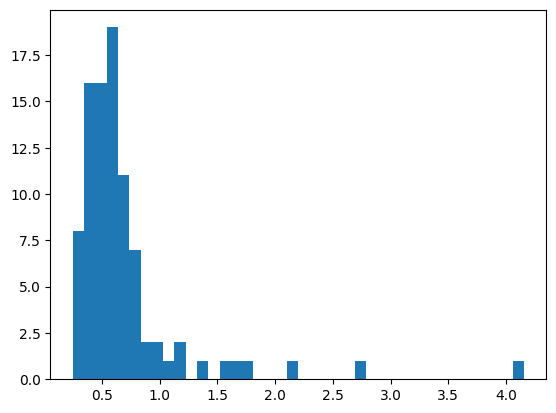

In [52]:
plt.hist((mgas2500 / (mgas500-mgas2500)), bins=40)

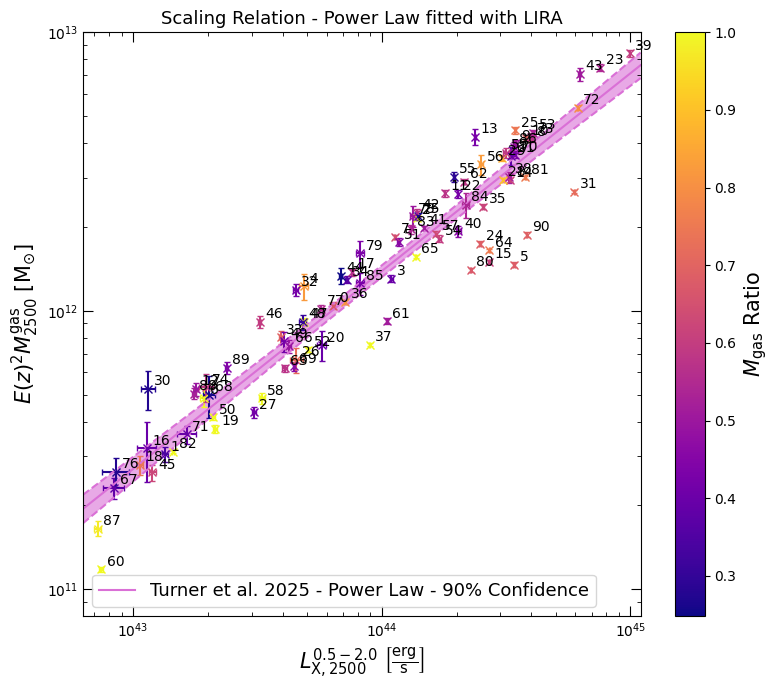

In [73]:
mgas2500_lx52_2500._third_dim_info = rat
mgas2500_lx52_2500._third_dim_name = r"$M_{\rm{gas}}$ Ratio"

mgas2500_lx52_2500.view(figsize=(8, 7), y_lims=Quantity([0.8e+11, 1e+13], 'Msun'), label_points=True, 
                         point_label_offset=(0.01, 0.001))

In [104]:
# As the relation is not guaranteed to contain all the data points in the same file, nor to necessarily be in the same order, we 
#  use this search-sorted trick to get the indices in the base sample that correspond to the names given to each datapoint when 
#  the scaling relation was constructed
sort_rel_names = np.argsort(sdssxcs_samp['name'].values)
pnt_samp_ind = sort_rel_names[np.searchsorted(sdssxcs_samp['name'].values, mgas2500_lxbol_2500.point_names, sorter=sort_rel_names)]

# Reads out gas masses in two apertures, in the right order!
z = sdssxcs_samp.loc[pnt_samp_ind, 'z'].values
mgas2500 = Quantity(sdssxcs_samp.loc[pnt_samp_ind, 'Mg2500_wraderr'].values*1e+14, 'Msun')

pred_gas = mgas2500_lxbol_2500.predict(mgas2500_lxbol_2500.x_data[:, 0], x_errors=mgas2500_lxbol_2500.x_data[:, 1], 
                                       redshift=z, cosmo=xcs_cosmo)

(array([ 2.,  1.,  0.,  1.,  2.,  9., 10., 12., 22., 32.]),
 array([-5.93579913e+13, -5.35093637e+13, -4.76607362e+13, -4.18121086e+13,
        -3.59634811e+13, -3.01148535e+13, -2.42662260e+13, -1.84175984e+13,
        -1.25689709e+13, -6.72034330e+12, -8.71715747e+11]),
 <BarContainer object of 10 artists>)

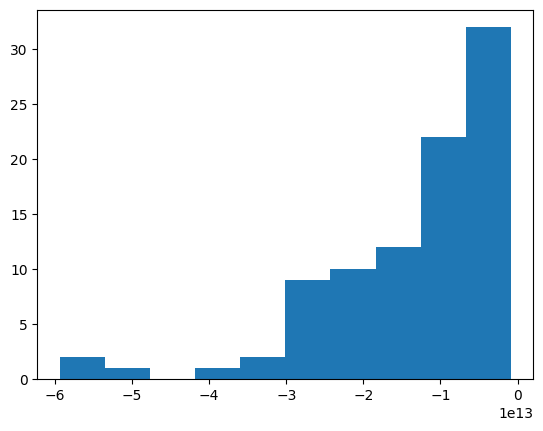

In [107]:
plt.hist(pred_gas[:, 0] - mgas2500)

In [108]:
(pred_gas[:, 0] - mgas2500).max()

<Quantity -8.71715747e+11 solMass>